# EEG Data interpretation -  Meditation and Alpha/Theta Ratio Analysis

## 1. Import Libraries and Setup


In [26]:
import mne
import pandas as pd
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# inline plotting
%matplotlib inline

# get the directory where this notebook is located
script_dir = Path.cwd()
# test

## 2. Load EEG Data


In [27]:
raw_classical_1 = mne.io.read_raw_brainvision(
        script_dir / "data/classical_A_M_2025-12-15_15-04-18.vhdr",
        preload=True
    )

raw_classical_2 = mne.io.read_raw_brainvision(
        script_dir / "data/classical_A_S_2025-12-18_10-40-05.vhdr",
        preload=True
    )

raw_classical_3 = mne.io.read_raw_brainvision(
        script_dir / "data/classical_S_HA_2025-12-18_14-05-33.vhdr",
        preload=True
    )

raw_rock_1 = mne.io.read_raw_brainvision(
        script_dir / "data/rock_B_A_2025-12-18_15-13-43.vhdr",
        preload=True
    )

raw_rock_2 = mne.io.read_raw_brainvision(
        script_dir / "data/rock_S_H_2025-12-18_11-57-47.vhdr",
        preload=True
    )

raw_rock_3 = mne.io.read_raw_brainvision(
        script_dir / "data/rock_S_M_2025-12-15_16-11-41.vhdr",
        preload=True
    )

Extracting parameters from /Users/harveersingh12/IdeaProjects/EEG/eeg-project/data/classical_A_M_2025-12-15_15-04-18.vhdr...
Setting channel info structure...
Reading 0 ... 651019  =      0.000 ...  1302.038 secs...
Extracting parameters from /Users/harveersingh12/IdeaProjects/EEG/eeg-project/data/classical_A_S_2025-12-18_10-40-05.vhdr...
Setting channel info structure...
Reading 0 ... 743975  =      0.000 ...  1487.950 secs...
Extracting parameters from /Users/harveersingh12/IdeaProjects/EEG/eeg-project/data/classical_S_HA_2025-12-18_14-05-33.vhdr...
Setting channel info structure...
Reading 0 ... 696130  =      0.000 ...  1392.260 secs...


/var/folders/z9/21wwc2sx0y96crz___73ywkw0000gn/T/ipykernel_23112/3328176140.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_classical_1 = mne.io.read_raw_brainvision(
/var/folders/z9/21wwc2sx0y96crz___73ywkw0000gn/T/ipykernel_23112/3328176140.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_classical_2 = mne.io.read_raw_brainvision(


Extracting parameters from /Users/harveersingh12/IdeaProjects/EEG/eeg-project/data/rock_B_A_2025-12-18_15-13-43.vhdr...
Setting channel info structure...
Reading 0 ... 748190  =      0.000 ...  1496.380 secs...
Extracting parameters from /Users/harveersingh12/IdeaProjects/EEG/eeg-project/data/rock_S_H_2025-12-18_11-57-47.vhdr...
Setting channel info structure...
Reading 0 ... 739870  =      0.000 ...  1479.740 secs...


/var/folders/z9/21wwc2sx0y96crz___73ywkw0000gn/T/ipykernel_23112/3328176140.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_classical_3 = mne.io.read_raw_brainvision(
/var/folders/z9/21wwc2sx0y96crz___73ywkw0000gn/T/ipykernel_23112/3328176140.py:16: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_rock_1 = mne.io.read_raw_brainvision(


Extracting parameters from /Users/harveersingh12/IdeaProjects/EEG/eeg-project/data/rock_S_M_2025-12-15_16-11-41.vhdr...
Setting channel info structure...
Reading 0 ... 659050  =      0.000 ...  1318.100 secs...


/var/folders/z9/21wwc2sx0y96crz___73ywkw0000gn/T/ipykernel_23112/3328176140.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_rock_2 = mne.io.read_raw_brainvision(
/var/folders/z9/21wwc2sx0y96crz___73ywkw0000gn/T/ipykernel_23112/3328176140.py:26: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_rock_3 = mne.io.read_raw_brainvision(


In [28]:
# 'standard_1020' - standard 10-20 system positions
montage = mne.channels.make_standard_montage('standard_1020')
raw_classical_1.set_montage(montage, match_case=False, on_missing='ignore')
raw_classical_2.set_montage(montage, match_case=False, on_missing='ignore')
raw_classical_3.set_montage(montage, match_case=False, on_missing='ignore')
raw_rock_1.set_montage(montage, match_case=False, on_missing='ignore')
raw_rock_2.set_montage(montage, match_case=False, on_missing='ignore')
raw_rock_3.set_montage(montage, match_case=False, on_missing='ignore')

<RawBrainVision | Rock_S_M_2025-12-15_16-11-41.eeg, 22 x 659051 (1318.1 s), ~110.7 MiB, data loaded>

## 3. Visualize Raw Data


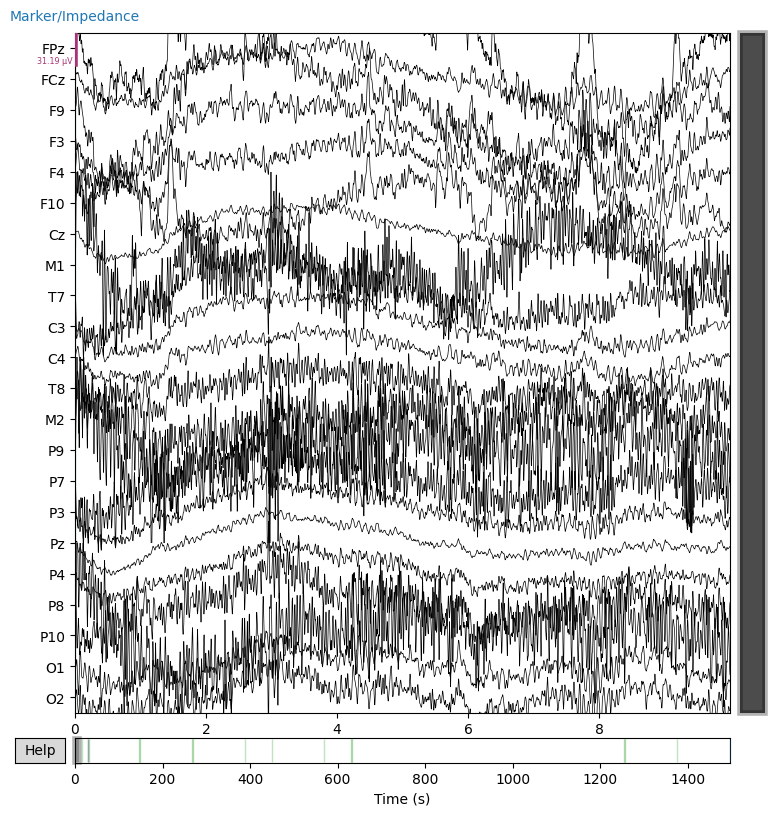

In [29]:
# plot raw data (Use show=False to prevent auto-display, then show explicitly)

#TODO: uncomment to visualize raw data and change raw_music_number to desired variable
raw_rock_1.plot(duration=10.0, n_channels=22, scalings='auto', title='Classical Music - Raw Data', show=False)
plt.show()


## Interpretation of Raw Time-Series Data: A_M

- Frontal/Central channels show high-amplitude artifacts: Channels FPz, FCz, F9, F3, F4, F10, Cz, M1, T7, C3, C4, T8, M2 display very high amplitude, irregular, noisy activity with sharp deflections
- Posterior channels appear cleaner: Channels P9, P7, P3, Pz, P4, P8, P10, O1, O2 show lower amplitude, more organized waveforms typical of EEG signals
- Likely causes of artifacts: Muscle activity (jaw, neck, facial), electrode contact issues (high impedance (electrical resistance of the scalp)), or movement artifacts in frontal/central regions
- Recording quality: Posterior channels suggest the recording setup is generally functional; issues appear localized to specific electrodes

In [30]:
# Power spectral density of raw data

# TODO: uncomment to visualize psd and change raw_music_number to desired variable
# fig, ax = plt.subplots(1, 1, figsize=(7, 5))
# psd = raw_music_number.compute_psd(fmax=100)
# psd.plot(axes=ax, show=False)
# ax.set_title('Raw Data - Power Spectral Density')
# plt.show()

## Interpretation of PSD Plot: A_M
- Prominent 50 Hz line noise: Sharp peak around 50 Hz across most channels, indicating power line interference that needs notch filtering (applies for all users)
- High power at low frequencies: Elevated power in the delta/theta range (2-8 Hz), typical of EEG baseline activity
- Alpha/beta activity present: Broad peaks around 10-25 Hz, indicating alpha and beta band activity
- Power decreases with frequency: General decline from low to high frequencies, consistent with EEG
- Channel variability: Differences in power levels across channels, reflecting spatial differences in brain activity
- Pre-filtering state: This is raw data; the 50 Hz peak should be removed with notch filtering (50, 100 Hz)
- Frequency content: Most power concentrated below 40 Hz, supporting the 1-40 Hz bandpass filter range

## 4. Preprocessing Pipeline


### 4.1 Notch Filtering (Remove Line Noise)


In [31]:
# copy for preprocessing
raw_classical_1_filtered = raw_classical_1.copy()
raw_classical_2_filtered = raw_classical_2.copy()
raw_classical_3_filtered = raw_classical_3.copy()
raw_rock_1_filtered = raw_rock_1.copy()
raw_rock_2_filtered = raw_rock_2.copy()
raw_rock_3_filtered = raw_rock_3.copy()

# 50 and 100 Hz notch filters
raw_classical_1_filtered.notch_filter([50, 100])
raw_classical_2_filtered.notch_filter([50, 100])
raw_classical_3_filtered.notch_filter([50, 100])
raw_rock_1_filtered.notch_filter([50, 100])
raw_rock_2_filtered.notch_filter([50, 100])
raw_rock_3_filtered.notch_filter([50, 100])


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bands

<RawBrainVision | Rock_S_M_2025-12-15_16-11-41.eeg, 22 x 659051 (1318.1 s), ~110.7 MiB, data loaded>

### 4.2 Bandpass Filtering (Keep 1-40 Hz)


In [32]:
# bandpass filter - 1-40 hz
raw_classical_1_filtered.filter(l_freq=1, h_freq=40)
raw_classical_2_filtered.filter(l_freq=1, h_freq=40)
raw_classical_3_filtered.filter(l_freq=1, h_freq=40)
raw_rock_1_filtered.filter(l_freq=1, h_freq=40)
raw_rock_2_filtered.filter(l_freq=1, h_freq=40)
raw_rock_3_filtered.filter(l_freq=1, h_freq=40)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 

<RawBrainVision | Rock_S_M_2025-12-15_16-11-41.eeg, 22 x 659051 (1318.1 s), ~110.7 MiB, data loaded>

In [33]:
# TODO: uncomment to visualize psd before and after filtering and change raw_music_number to desired variable
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Data PSD before filtering
# psd_before = raw_music_number.compute_psd(fmax=100)
# psd_before.plot(axes=axes[0], show=False)
# axes[0].set_title('Data PSD before Filtering')

# # Data PSD after filtering
# psd_after = raw_music_number_filtered.compute_psd(fmax=100)
# psd_after.plot(axes=axes[1], show=False)
# axes[1].set_title('Data PSD after Filtering')

# plt.show()


In [34]:
# TODO: uncomment to visualaze zoomed in psd and change raw_music_number to desired variable
# pre-ICA PSD: Focus on theta and alpha bands only for alpha/theta ratio analysis
# fig, ax = plt.subplots(figsize=(12, 8))

# psd_after = raw_music_number_filtered.compute_psd(
#     method='welch',
#     fmin=3.0, 
#     fmax=15.0, 
#     n_fft=4096, 
#     n_overlap=1024
# )

# psd_after.plot(axes=ax, show=False, picks='eeg', average=False)
# ax.set_title('Data PSD after Filtering - Theta (4-8 Hz) & Alpha (8-13 Hz) Focus', 
#             fontsize=14, fontweight='bold')
# ax.set_xlim(3, 15)
# ax.set_ylim(-40, 20)
# ax.set_xlabel('Frequency (Hz)', fontsize=12)
# ax.set_ylabel('Power (dB/Hz re 1 µV²)', fontsize=12)

# ax.axvline(4, color='gray', linestyle='--', alpha=0.5, linewidth=1)
# ax.axvline(8, color='gray', linestyle='--', alpha=0.5, linewidth=1)
# ax.axvline(13, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# ax.axvspan(4, 8, alpha=0.05, color='gray', linewidth=0)
# ax.axvspan(8, 13, alpha=0.05, color='gray', linewidth=0)

# ax.grid(True, alpha=0.3, linestyle='--')
# plt.show()

### 4.2.5 Automated Artifact Detection Helpers (Optional - Speeds Up ICA Review)

The functions below help automate artifact detection to speed up the tedious process of identifying which ICA components to exclude. They use multiple methods (EOG, ECG, muscle artifacts, statistical outliers) to suggest components that likely contain artifacts.

**Workflow:**
1. Fit ICA (next section)
2. Run `detect_artifacts_automated()` to get suggestions
3. Review only the suggested components (much faster than reviewing all!)
4. Confirm visually, then set `ica.exclude`

In [35]:
# Automated Artifact Detection Helper Functions
# These functions help speed up ICA component identification

from scipy import stats
import mne.time_frequency

def detect_artifacts_automated(ica, raw, method='combined', verbose=True):
    """
    Automatically detect artifact components using multiple methods.
    
    Parameters:
    -----------
    ica : mne.preprocessing.ICA
        Fitted ICA object
    raw : mne.io.Raw
        Raw data (filtered, before ICA)
    method : str
        'combined' (default), 'eog', 'ecg', 'muscle', 'statistical', or 'all'
    verbose : bool
        Print detection results
    
    Returns:
    --------
    dict : Dictionary with suggested exclusions for each artifact type
    """
    suggestions = {
        'eog': [],
        'ecg': [],
        'muscle': [],
        'statistical': [],
        'all_suggested': []
    }
    
    # Method 1: EOG detection (eye blinks/movements)
    if method in ['eog', 'combined', 'all']:
        try:
            # Find frontal channels that might be EOG
            eog_channels = [ch for ch in raw.ch_names if any(x in ch.upper() for x in ['FP', 'FZ', 'F1', 'F2', 'F3', 'F4'])]
            if eog_channels:
                # Use correlation method
                eog_scores = ica.find_bads_eog(raw, ch_name=eog_channels[0] if eog_channels else None)
                if eog_scores is not None:
                    # Convert to list - handle tuple, list, or single value
                    if isinstance(eog_scores, tuple):
                        eog_list = list(eog_scores)
                    elif isinstance(eog_scores, list):
                        eog_list = eog_scores
                    else:
                        eog_list = [eog_scores]
                    suggestions['eog'] = eog_list[:3]  # Top 3 EOG-like components
        except Exception as e:
            if verbose:
                print(f"EOG detection failed: {e}")
    
    # Method 2: ECG detection (heartbeat artifacts)
    # Note: ECG detection requires ECG channels, which are typically not available in EEG
    # Skip this for EEG data or if no ECG channels are present
    if method in ['ecg', 'combined', 'all']:
        try:
            # Check if ECG channels exist
            has_ecg = any('ecg' in ch.lower() for ch in raw.ch_names)
            if not has_ecg:
                if verbose:
                    print("ECG detection skipped: No ECG channels found (typical for EEG data)")
            else:
                ecg_scores = ica.find_bads_ecg(raw, method='correlation')
                if ecg_scores is not None:
                    # Convert to list - handle tuple, list, or single value
                    if isinstance(ecg_scores, tuple):
                        ecg_list = list(ecg_scores)
                    elif isinstance(ecg_scores, list):
                        ecg_list = ecg_scores
                    else:
                        ecg_list = [ecg_scores]
                    suggestions['ecg'] = ecg_list[:2]  # Top 2 ECG-like components
        except Exception as e:
            if verbose:
                print(f"ECG detection skipped: {e} (ECG detection typically not applicable for EEG data)")
    
    # Method 3: Statistical methods (high kurtosis/variance = artifacts)
    if method in ['statistical', 'combined', 'all']:
        try:
            # Get component time series
            sources = ica.get_sources(raw).get_data()
            
            # Calculate metrics for each component
            metrics = []
            for i in range(sources.shape[0]):
                comp_data = sources[i, :]
                kurt = np.abs(stats.kurtosis(comp_data))  # High kurtosis = spikes/artifacts
                var = np.var(comp_data)  # High variance = artifacts
                max_amp = np.max(np.abs(comp_data))  # High amplitude = artifacts
                
                # Combined score (normalize each metric)
                kurt_norm = (kurt - np.min([stats.kurtosis(sources[j, :]) for j in range(sources.shape[0])])) / \
                           (np.max([stats.kurtosis(sources[j, :]) for j in range(sources.shape[0])]) - 
                            np.min([stats.kurtosis(sources[j, :]) for j in range(sources.shape[0])]) + 1e-10)
                var_norm = (var - np.min([np.var(sources[j, :]) for j in range(sources.shape[0])])) / \
                          (np.max([np.var(sources[j, :]) for j in range(sources.shape[0])]) - 
                           np.min([np.var(sources[j, :]) for j in range(sources.shape[0])]) + 1e-10)
                
                score = kurt_norm * 0.5 + var_norm * 0.5
                metrics.append((i, score, kurt, var, max_amp))
            
            # Sort by score and take top components
            metrics.sort(key=lambda x: x[1], reverse=True)
            # Suggest components with score > 0.6 or in top 20%
            threshold = max(0.6, np.percentile([m[1] for m in metrics], 80))
            suggestions['statistical'] = [m[0] for m in metrics if m[1] > threshold][:5]
            
        except Exception as e:
            if verbose:
                print(f"Statistical detection failed: {e}")
    
    # Method 4: Muscle artifact detection (high frequency content)
    if method in ['muscle', 'combined', 'all']:
        try:
            sources = ica.get_sources(raw)
            # Compute PSD for each component
            psds, freqs = mne.time_frequency.psd_array_welch(
                sources.get_data(), 
                sfreq=sources.info['sfreq'],
                fmin=20, fmax=40  # Muscle artifacts are high frequency
            )
            
            # Find components with high power in 20-40 Hz range
            high_freq_power = np.mean(psds[:, (freqs >= 20) & (freqs <= 40)], axis=1)
            total_power = np.mean(psds, axis=1)
            ratio = high_freq_power / (total_power + 1e-10)
            
            # Components with high ratio are likely muscle artifacts
            muscle_threshold = np.percentile(ratio, 75)
            suggestions['muscle'] = [i for i, r in enumerate(ratio) if r > muscle_threshold][:3]
            
        except Exception as e:
            if verbose:
                print(f"Muscle detection failed: {e}")
    
    # Combine all suggestions (remove duplicates)
    # Helper function to flatten nested structures and extract only integers
    def flatten_to_ints(obj):
        """Recursively flatten nested lists/tuples and extract only integers"""
        result = []
        if isinstance(obj, (list, tuple)):
            for item in obj:
                result.extend(flatten_to_ints(item))
        elif isinstance(obj, (int, np.integer)):
            result.append(int(obj))
        return result
    
    # Collect all integer component indices from all suggestion types
    all_ints = []
    for key in ['eog', 'ecg', 'statistical', 'muscle']:
        val = suggestions[key]
        if val:
            all_ints.extend(flatten_to_ints(val))
    
    # Remove duplicates and sort (only keep valid integers)
    all_suggested = sorted(list(set(all_ints)))
    suggestions['all_suggested'] = sorted(all_suggested)
    
    if verbose:
        print("\n" + "="*60)
        print("AUTOMATED ARTIFACT DETECTION RESULTS")
        print("="*60)
        print(f"EOG-like components (eye blinks): {suggestions['eog']}")
        print(f"ECG-like components (heartbeat): {suggestions['ecg']}")
        print(f"Muscle artifact components: {suggestions['muscle']}")
        print(f"Statistical outliers (high kurtosis/variance): {suggestions['statistical']}")
        print(f"\nALL SUGGESTED COMPONENTS TO REVIEW: {suggestions['all_suggested']}")
        print("="*60)
        print("\n⚠️  IMPORTANT: These are SUGGESTIONS. Always visually inspect:")
        print("   - ica.plot_components(picks=suggestions['all_suggested'])")
        print("   - ica.plot_properties(raw, picks=suggestions['all_suggested'])")
        print("   Then manually confirm before excluding.\n")
    
    return suggestions


def quick_ica_review(ica, raw, suggested_exclude=None):
    """
    Quickly visualize suggested artifact components for manual review.
    
    Parameters:
    -----------
    ica : mne.preprocessing.ICA
        Fitted ICA object
    raw : mne.io.Raw
        Raw data
    suggested_exclude : list, optional
        List of component indices to focus on
    """
    if suggested_exclude is None:
        suggested_exclude = list(range(min(10, ica.n_components_)))
    
    print(f"\nVisualizing {len(suggested_exclude)} components for review...")
    
    # Plot component topographies
    fig = ica.plot_components(picks=suggested_exclude, show=False)
    
    # Plot component properties (time series, spectrum, etc.) - limit to first 5 for speed
    for comp in suggested_exclude[:5]:
        fig = ica.plot_properties(raw, picks=[comp], show=False)
    
    print("Review complete. Check the plots above to confirm artifacts.")
    return fig

### 4.3 ICA (Independent Component Analysis)

In [36]:

# fit ica on filtered data
ica_classical_1 = ICA(n_components=20, random_state=97, max_iter='auto')
ica_classical_1.fit(raw_classical_1_filtered)

ica_classical_2 = ICA(n_components=20, random_state=97, max_iter='auto')
ica_classical_2.fit(raw_classical_2_filtered)

ica_classical_3 = ICA(n_components=20, random_state=97, max_iter='auto')
ica_classical_3.fit(raw_classical_3_filtered)

ica_rock_1 = ICA(n_components=20, random_state=97, max_iter='auto')
ica_rock_1.fit(raw_rock_1_filtered)

ica_rock_2 = ICA(n_components=20, random_state=97, max_iter='auto')
ica_rock_2.fit(raw_rock_2_filtered)

ica_rock_3 = ICA(n_components=20, random_state=97, max_iter='auto')
ica_rock_3.fit(raw_rock_3_filtered)

# show ica components

# TODO: uncomment to visualize ica components and change raw_music_number to desired variable
# fig = ica_music_number.plot_components()

# TODO: find artifacts to exclude in the next step

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.3s.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.9s.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.1s.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.3s.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.9s.
Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 3.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,41 iterations on raw data (659051 samples)
ICA components,20
Available PCA components,22
Channel types,eeg
ICA components marked for exclusion,—


#### Example: Using Automated Artifact Detection (Optional but Recommended)

After fitting ICA above, you can use the automated detection functions to get suggestions for which components likely contain artifacts. This saves significant time by focusing your review on only the suspicious components.

Using EOG channel: FPz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

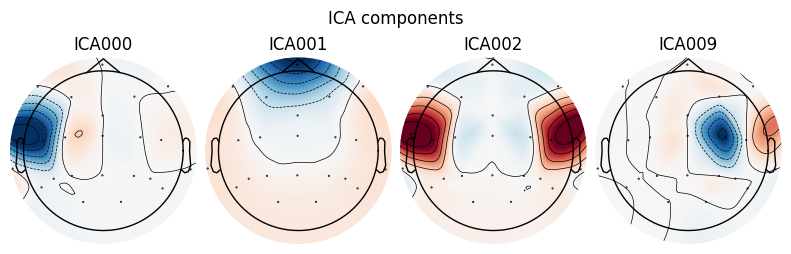

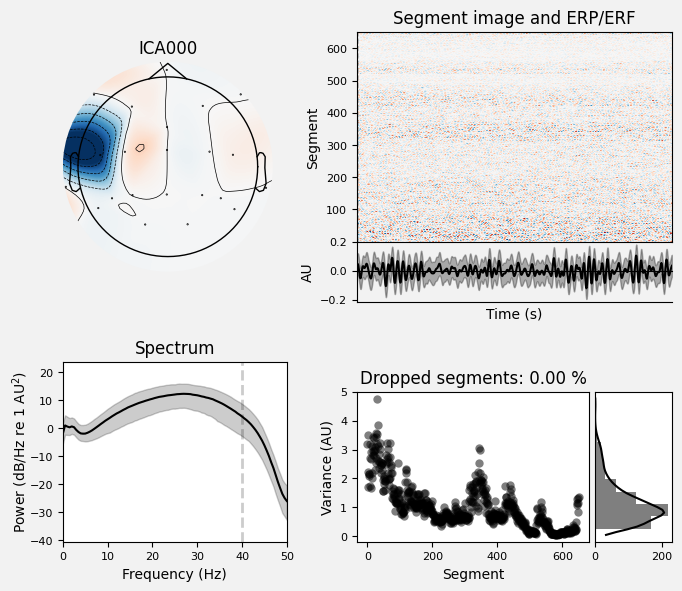

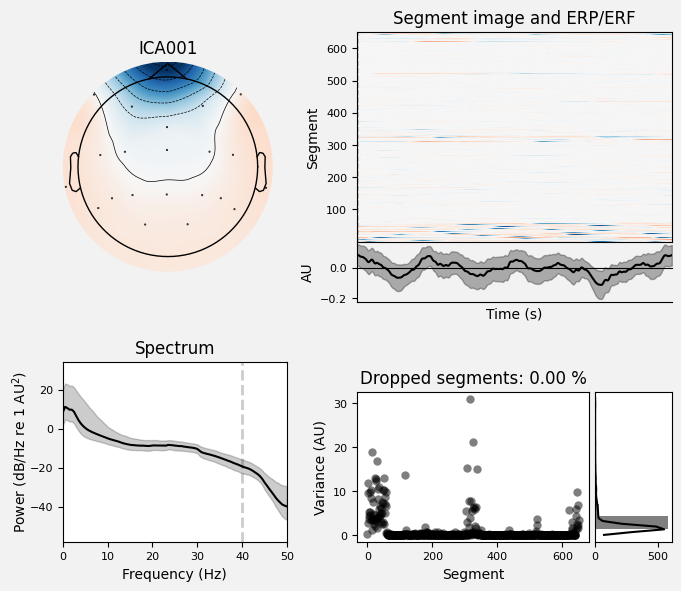

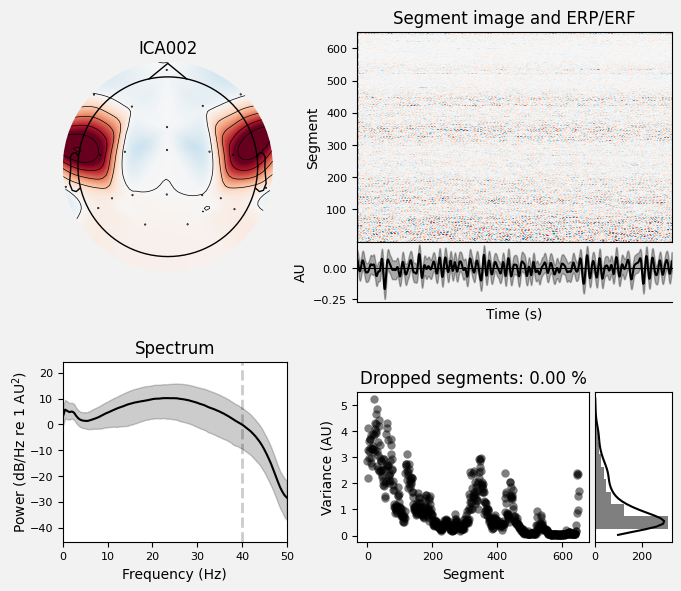

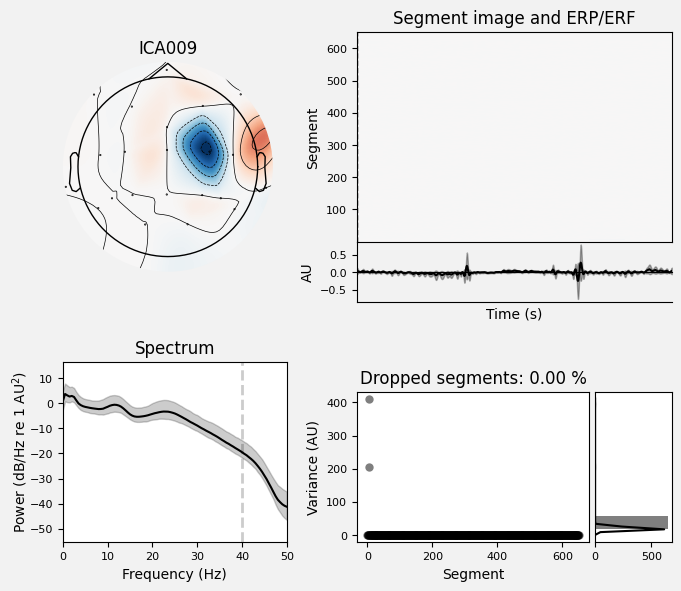

In [37]:
# Example: Automated artifact detection for one subject
# Uncomment and modify the variable names to match your data:

# Get automated suggestions (replace ica_classical_1 and raw_classical_1_filtered with your variables)
suggestions = detect_artifacts_automated(ica_classical_1, raw_classical_1_filtered, method='combined', verbose=True)

# Quick review of suggested components (much faster than reviewing all 20!)
quick_ica_review(ica_classical_1, raw_classical_1_filtered, suggested_exclude=suggestions['all_suggested'])

# After reviewing the plots above, set exclusions:
# ica_classical_1.exclude = suggestions['all_suggested']  # Use suggestions, or manually adjust

print(f"\nSuggested components to exclude: {suggestions['all_suggested']}")
print("Review the plots above, then set ica.exclude with confirmed components.")

In [38]:
# ICA component properties - helps you find artifacts
# look for
# - activity frontal channels - eye blinks
# - activity temporal channels - muscle artifacts
# - unusual frequency content


# TODO: uncomment to visualize ica component properties and change ica_music_number to desired variable
# ica_music_number.plot_properties(raw_music_number_filtered, picks=[1,2,3,8]) # change picks as needed


### 4.4 Apply ICA (Remove Artifacts)

**!!! IMPORTANT !!!** Before running this cell, you should:
1. Inspect the ICA components
2. Identify rtifacts
3. Set `ica.exclude`


In [39]:
ica_classical_1.exclude = [1,3,4,6,16]  # indexes of excluded components
ica_classical_2.exclude = [0,3,5,19]  # indexes of excluded components
ica_classical_3.exclude = [0,3,4,5,19]  # indexes of excluded components
ica_rock_1.exclude = [0,4,6,13,17]  # indexes of excluded components
ica_rock_2.exclude = [1,2,13,15,17,18,19]  # indexes of excluded components
ica_rock_3.exclude = [1,3,5,6,8,12]  # indexes of excluded components

# apply ICA
raw_classical_1_clean = ica_classical_1.apply(raw_classical_1_filtered.copy())
raw_classical_2_clean = ica_classical_2.apply(raw_classical_2_filtered.copy())
raw_classical_3_clean = ica_classical_3.apply(raw_classical_3_filtered.copy())
raw_rock_1_clean = ica_rock_1.apply(raw_rock_1_filtered.copy())
raw_rock_2_clean = ica_rock_2.apply(raw_rock_2_filtered.copy())
raw_rock_3_clean = ica_rock_3.apply(raw_rock_3_filtered.copy())

Applying ICA to Raw instance


    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 22 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 4 ICA components
    Projecting back using 22 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 22 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 22 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 7 ICA components
    Projecting back using 22 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 22 PCA components


## 5. Visualize Cleaned Data


In [40]:
# plot clean data

# TODO: uncomment to visualize cleaned data and change raw_music_number to desired variable
# raw_music_number_clean.plot(duration=10.0, n_channels=22, scalings='auto', 
#                        title='Cleaned Data', show=False)
# plt.show()

In [41]:
# compare psd before and after cleaning

# TODO: uncomment to visualize psd before and after filtering and change raw_music_number to desired variable
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Raw data
# psd_raw = raw_music_number.compute_psd(fmax=50)
# psd_raw.plot(axes=axes[0], show=False)
# axes[0].set_title('Raw Data')

# # Cleaned data
# psd_clean = raw_music_number_clean.compute_psd(fmax=50)
# psd_clean.plot(axes=axes[1], show=False)
# axes[1].set_title('Cleaned Data')

# plt.show()

In [42]:
# post-ICA PSD: Full filtered range (1-40 Hz)

# TODO: uncomment to visualize cleaned psd and change raw_music_number to desired variable
# fig, ax = plt.subplots(figsize=(12, 8))

# psd_clean = raw_music_number_clean.compute_psd(
#     method='welch',
#     fmin=1.0, 
#     fmax=40.0, 
#     n_fft=4096, 
#     n_overlap=1024
# )

# psd_clean.plot(axes=ax, show=False, picks='eeg', average=False)
# ax.set_title('Cleaned Data PSD - Full Filtered Range (1-40 Hz)', 
#             fontsize=14, fontweight='bold')
# ax.set_xlim(1, 40)
# ax.set_ylim(-40, 20)
# ax.set_xlabel('Frequency (Hz)', fontsize=12)
# ax.set_ylabel('Power (dB/Hz re 1 µV²)', fontsize=12)

# ax.grid(True, alpha=0.3, linestyle='--')
# plt.show()

In [43]:
# post-ICA PSD: Focus on theta and alpha bands only for alpha/theta ratio analysis


# TODO: uncomment to visualize cleaned psd and change raw_music_number to desired variable
# fig, ax = plt.subplots(figsize=(12, 8))

# psd_clean = raw_music_number_clean.compute_psd(
#     method='welch',
#     fmin=3.0, 
#     fmax=15.0, 
#     n_fft=4096, 
#     n_overlap=1024
# )

# psd_clean.plot(axes=ax, show=False, picks='eeg', average=False)
# ax.set_title('Cleaned Data PSD - Theta (4-8 Hz) & Alpha (8-13 Hz) Focus', 
#             fontsize=14, fontweight='bold')
# ax.set_xlim(3, 15)
# ax.set_ylim(-20, 20)
# ax.set_xlabel('Frequency (Hz)', fontsize=12)
# ax.set_ylabel('Power (dB/Hz re 1 µV²)', fontsize=12)

# ax.grid(True, alpha=0.3, linestyle='--')
# plt.show()

## 6. Epoching

Segment the continuous data into epochs based on experimental protocol phases.
s1000 marks the protocol start, and s1050 markers indicate the end of each phase.


In [44]:
protocol_starts = []

raw_datasets = [
    raw_classical_1_clean,
    raw_classical_2_clean,
    raw_classical_3_clean,
    raw_rock_1_clean,
    raw_rock_2_clean,
    raw_rock_3_clean,
]

for idx, raw in enumerate(raw_datasets, start=1):
    start_time = None

    # find s1000
    for onset, description in zip(raw.annotations.onset, raw.annotations.description):
        if 's1000' in str(description):
            start_time = onset
            break

    # no s1000? find s1050
    if start_time is None:
        for onset, description in zip(raw.annotations.onset, raw.annotations.description):
            if 's1050' in str(description):
                start_time = onset
                break

    protocol_starts.append(start_time)
    print(f"Dataset {idx}: start = {start_time:.1f}s")


Dataset 1: start = 116.1s
Dataset 2: start = 7.3s
Dataset 3: start = 14.3s
Dataset 4: start = 16.2s
Dataset 5: start = 13.4s
Dataset 6: start = 77.8s


In [45]:
base_phase_durations = [120, 120, 120, 60, 120, 60, 600]
post_task_duration = 120

datasets_with_7_phases = {1, 6}  # classical_1 and rock_3

all_phase_boundaries = {}

for idx, raw in enumerate(raw_datasets, start=1):

    protocol_start = protocol_starts[idx - 1]

    print(f"Dataset {idx}: start = {protocol_start:.1f}s")

    current_time = protocol_start
    recording_end = raw.times[-1]
    phase_boundaries = {}

    for i, duration in enumerate(base_phase_durations, start=1):
        phase_name = f"phase_{i}"
        phase_start = current_time
        phase_end = min(current_time + duration, recording_end)
        phase_boundaries[phase_name] = (phase_start, phase_end)
        current_time = phase_end

    if idx not in datasets_with_7_phases:
        phase_start = current_time
        phase_end = min(current_time + post_task_duration, recording_end)
        phase_boundaries["phase_8"] = (phase_start, phase_end)

    all_phase_boundaries[idx] = phase_boundaries

    print(f"\nDataset {idx} phases")
    for phase, (start, end) in phase_boundaries.items():
        dur = end - start
        print(f"  {phase}: {start:.1f}s – {end:.1f}s ({dur/60:.1f} min)")


Dataset 1: start = 116.1s

Dataset 1 phases
  phase_1: 116.1s – 236.1s (2.0 min)
  phase_2: 236.1s – 356.1s (2.0 min)
  phase_3: 356.1s – 476.1s (2.0 min)
  phase_4: 476.1s – 536.1s (1.0 min)
  phase_5: 536.1s – 656.1s (2.0 min)
  phase_6: 656.1s – 716.1s (1.0 min)
  phase_7: 716.1s – 1302.0s (9.8 min)
Dataset 2: start = 7.3s

Dataset 2 phases
  phase_1: 7.3s – 127.3s (2.0 min)
  phase_2: 127.3s – 247.3s (2.0 min)
  phase_3: 247.3s – 367.3s (2.0 min)
  phase_4: 367.3s – 427.3s (1.0 min)
  phase_5: 427.3s – 547.3s (2.0 min)
  phase_6: 547.3s – 607.3s (1.0 min)
  phase_7: 607.3s – 1207.3s (10.0 min)
  phase_8: 1207.3s – 1327.3s (2.0 min)
Dataset 3: start = 14.3s

Dataset 3 phases
  phase_1: 14.3s – 134.3s (2.0 min)
  phase_2: 134.3s – 254.3s (2.0 min)
  phase_3: 254.3s – 374.3s (2.0 min)
  phase_4: 374.3s – 434.3s (1.0 min)
  phase_5: 434.3s – 554.3s (2.0 min)
  phase_6: 554.3s – 614.3s (1.0 min)
  phase_7: 614.3s – 1214.3s (10.0 min)
  phase_8: 1214.3s – 1334.3s (2.0 min)
Dataset 4: sta

In [46]:
epoch_duration = 30.0
epoch_overlap = 0.0
all_epochs_per_dataset = {}

for idx, raw in enumerate(raw_datasets, start=1):
    phase_boundaries = all_phase_boundaries[idx]
    all_epochs_list = []
    all_metadata_list = []

    with mne.utils.use_log_level('ERROR'):
        for phase_name, (start, end) in phase_boundaries.items():
            phase_start = max(0.0, start)
            phase_end = min(end, raw.times[-1])
            phase_length = phase_end - phase_start
            if phase_length <= 0:
                continue

            raw_phase = raw.copy().crop(tmin=phase_start, tmax=phase_end)
            epochs_phase = mne.make_fixed_length_epochs(
                raw_phase,
                duration=epoch_duration,
                overlap=epoch_overlap,
                preload=True
            )

            n_epochs = len(epochs_phase)
            phase_metadata = pd.DataFrame({
                'phase': [phase_name] * n_epochs,
                'epoch_in_phase': range(n_epochs)
            })
            epochs_phase.metadata = phase_metadata

            all_epochs_list.append(epochs_phase)
            all_metadata_list.append(phase_metadata)

    if len(all_epochs_list) > 0:
        with mne.utils.use_log_level('ERROR'):
            combined_epochs = mne.concatenate_epochs(all_epochs_list)
        combined_epochs.metadata = pd.concat(all_metadata_list, ignore_index=True)
        all_epochs_per_dataset[idx] = combined_epochs

        # Print concise summary
        total_epochs = len(combined_epochs)
        phase_counts = combined_epochs.metadata['phase'].value_counts().to_dict()
        print(f"Dataset {idx}: {total_epochs} epochs → {phase_counts}")
    else:
        print(f"Dataset {idx}: No epochs created")


Replacing existing metadata with 2 columns
Dataset 1: 39 epochs → {'phase_7': 19, 'phase_1': 4, 'phase_2': 4, 'phase_3': 4, 'phase_5': 4, 'phase_4': 2, 'phase_6': 2}
Replacing existing metadata with 2 columns
Dataset 2: 44 epochs → {'phase_7': 20, 'phase_1': 4, 'phase_2': 4, 'phase_3': 4, 'phase_5': 4, 'phase_8': 4, 'phase_4': 2, 'phase_6': 2}
Replacing existing metadata with 2 columns
Dataset 3: 44 epochs → {'phase_7': 20, 'phase_1': 4, 'phase_2': 4, 'phase_3': 4, 'phase_5': 4, 'phase_8': 4, 'phase_4': 2, 'phase_6': 2}
Replacing existing metadata with 2 columns
Dataset 4: 44 epochs → {'phase_7': 20, 'phase_1': 4, 'phase_2': 4, 'phase_3': 4, 'phase_5': 4, 'phase_8': 4, 'phase_4': 2, 'phase_6': 2}
Replacing existing metadata with 2 columns
Dataset 5: 44 epochs → {'phase_7': 20, 'phase_1': 4, 'phase_2': 4, 'phase_3': 4, 'phase_5': 4, 'phase_8': 4, 'phase_4': 2, 'phase_6': 2}
Replacing existing metadata with 2 columns
Dataset 6: 40 epochs → {'phase_7': 20, 'phase_1': 4, 'phase_2': 4, 'pha

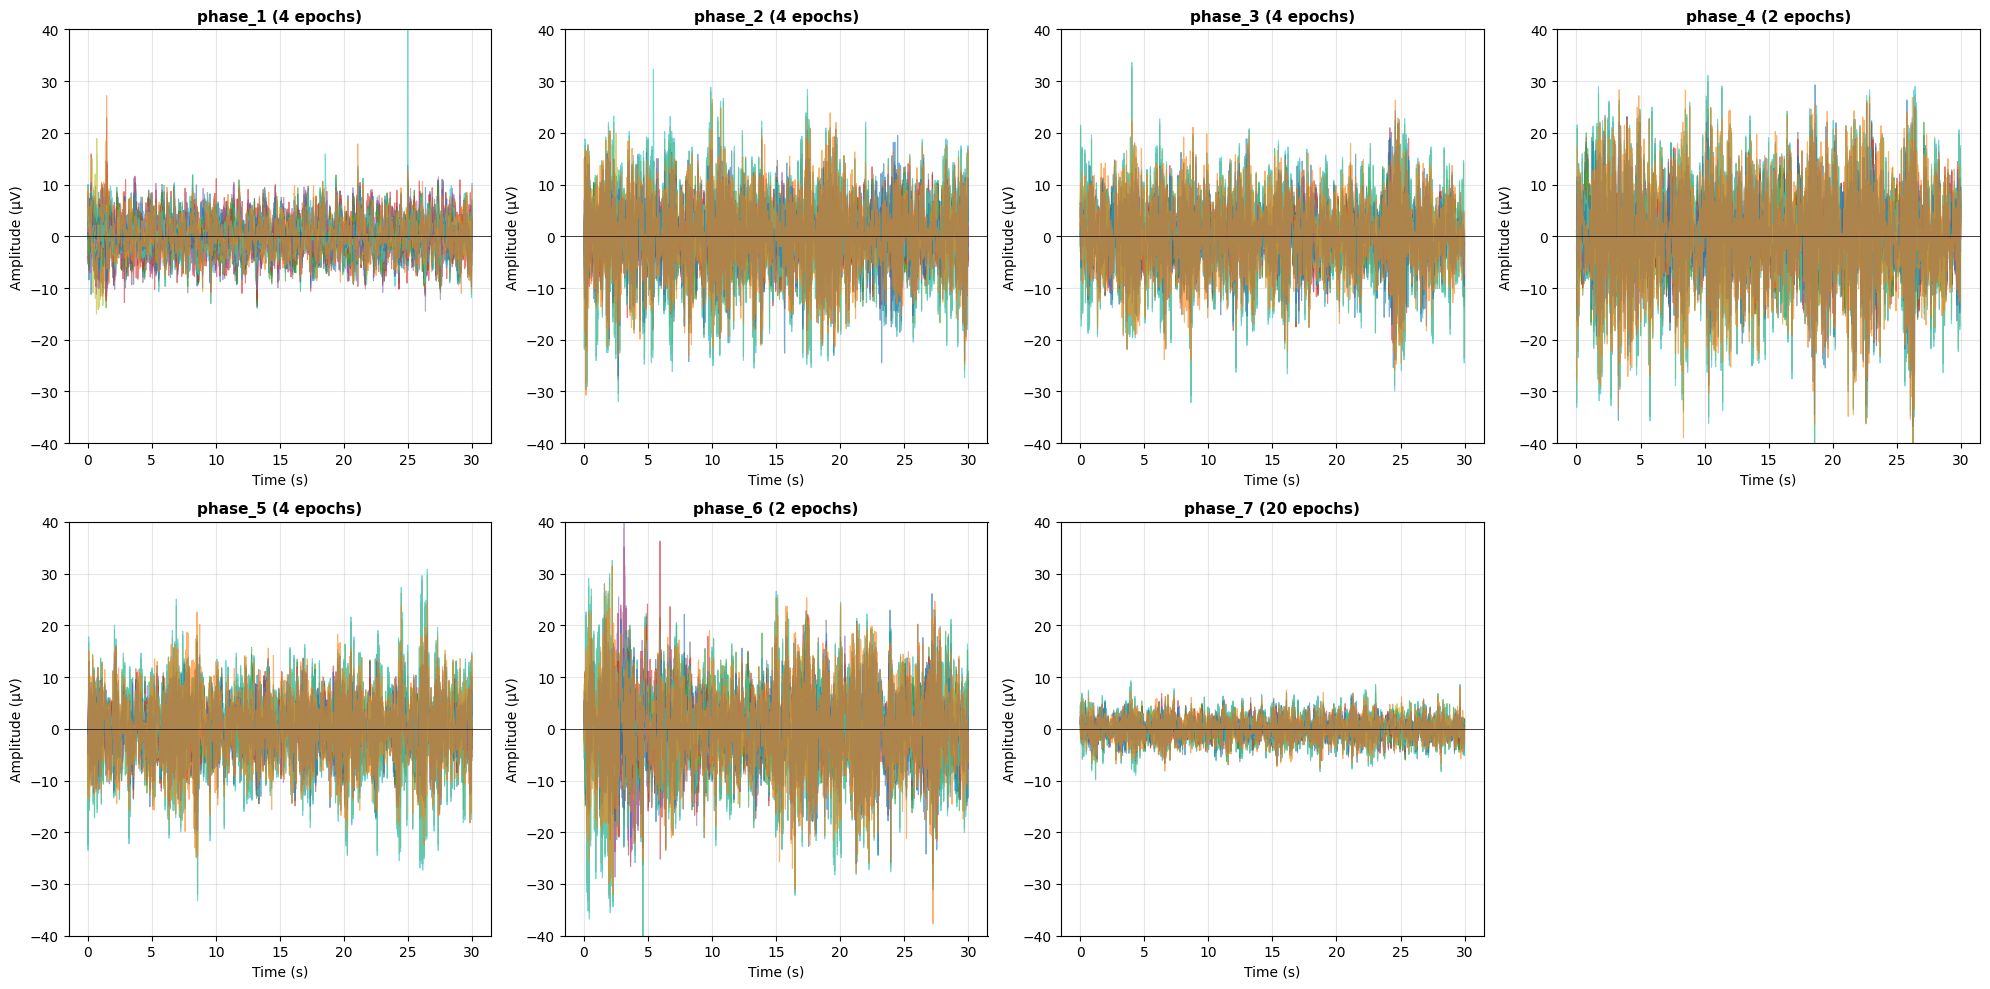

In [47]:
import matplotlib.pyplot as plt

#TODO: choose dataset no.
dataset_idx = 6
epochs_all = all_epochs_per_dataset[dataset_idx]

phase_names = epochs_all.metadata['phase'].unique()
n_phases = len(phase_names)
n_rows = 2
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

# choose how much you see of Y amplitude
ymin, ymax = -40, 40  

for idx, phase_name in enumerate(phase_names):
    epochs_phase = epochs_all[epochs_all.metadata['phase'] == phase_name]
    evoked = epochs_phase.average()
    data = evoked.get_data() * 1e6  
    times = evoked.times
    
    for ch_data in data:
        axes[idx].plot(times, ch_data, alpha=0.6, linewidth=0.8)
    
    axes[idx].set_title(f"{phase_name} ({len(epochs_phase)} epochs)", fontsize=11, fontweight='bold')
    axes[idx].set_xlabel("Time (s)")
    axes[idx].set_ylabel("Amplitude (µV)")
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(0, color='black', linewidth=0.5)
    axes[idx].set_ylim(ymin, ymax)  

for idx in range(n_phases, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


In [48]:
# Create epochs_by_phase and labeled_phases dictionaries
# Map phase numbers to descriptive phase names
phase_name_mapping = {
    'phase_1': 'baseline_EO',
    'phase_2': 'baseline_EC',
    'phase_3': 'task_no_music',
    'phase_4': 'break1',
    'phase_5': 'task_music',
    'phase_6': 'break2',
    'phase_7': 'meditation',
    'phase_8': 'post_EC'
}

# Get phase boundaries for the selected dataset
phase_boundaries = all_phase_boundaries[dataset_idx]

# Create epochs_by_phase: dictionary mapping phase names to epoch objects
epochs_by_phase = {}
for phase_num in epochs_all.metadata['phase'].unique():
    phase_label = phase_name_mapping.get(phase_num, phase_num)  # Use mapped name or fallback to original
    epochs_by_phase[phase_label] = epochs_all[epochs_all.metadata['phase'] == phase_num]

# Create labeled_phases: dictionary mapping phase names to (start, end) time tuples
labeled_phases = {}
for phase_num, (start, end) in phase_boundaries.items():
    phase_label = phase_name_mapping.get(phase_num, phase_num)  # Use mapped name or fallback to original
    labeled_phases[phase_label] = (start, end)

print(f"Created epochs_by_phase with {len(epochs_by_phase)} phases:")
for phase_name, epochs_phase in epochs_by_phase.items():
    print(f"  {phase_name}: {len(epochs_phase)} epochs")

Created epochs_by_phase with 7 phases:
  baseline_EO: 4 epochs
  baseline_EC: 4 epochs
  task_no_music: 4 epochs
  break1: 2 epochs
  task_music: 4 epochs
  break2: 2 epochs
  meditation: 20 epochs


## Observations 
- Meditation phase stands out:
    - Much lower amplitudes (-4 to 3 µV) vs others (-10 to 20 µV)
    - More stable signal
    - 315 epochs (longest phase)
- Consistent with a relaxed/meditative state
    - Task phases show higher activity:
    - task_no_music: highest amplitudes (-20 to 20 µV)
    - task_music: moderate amplitudes (-15 to 15 µV)
    - Expected during active tasks
- Baseline phases:
    - baseline_EO and baseline_EC: moderate amplitudes
    - baseline_EC slightly higher than baseline_EO (typical)
- Break phases:
    - Lower amplitudes, more stable
    - Consistent with rest periods

In [49]:
# Summary table of epochs by phase
comprehensive_data = []

for phase_name, epochs_phase in epochs_by_phase.items():
    if len(epochs_phase) > 0:
        data = epochs_phase.get_data()
        phase_start, phase_end = labeled_phases[phase_name]
        
        # Overall statistics
        max_amp = np.abs(data).max() * 1e6
        mean_amp = np.abs(data).mean() * 1e6
        std_amp = data.std() * 1e6
        
        # Per-channel average
        channel_means = np.abs(data).mean(axis=(0, 2)) * 1e6
        max_channel_amp = channel_means.max()
        min_channel_amp = channel_means.min()
        mean_channel_amp = channel_means.mean()
        
        comprehensive_data.append({
            'Phase': phase_name,
            'N_Epochs': len(epochs_phase),
            'Start_s': phase_start,
            'End_s': phase_end,
            'Duration_s': phase_end - phase_start,
            'Duration_min': (phase_end - phase_start) / 60,
            'Max_Amp_µV': max_amp,
            'Mean_Amp_µV': mean_amp,
            'Std_Amp_µV': std_amp,
            'Max_Channel_Mean_µV': max_channel_amp,
            'Min_Channel_Mean_µV': min_channel_amp,
            'Mean_Channel_Mean_µV': mean_channel_amp
        })

comprehensive_df = pd.DataFrame(comprehensive_data)
comprehensive_df

,Phase,N_Epochs,Start_s,End_s,Duration_s,Duration_min,Max_Amp_µV,Mean_Amp_µV,Std_Amp_µV,Max_Channel_Mean_µV,Min_Channel_Mean_µV,Mean_Channel_Mean_µV
0,baseline_EO,4,77.766,197.766,120.0,2.0,195.687061,4.372854,5.886569,5.646955,1.636321,4.372854
1,baseline_EC,4,197.766,317.766,120.0,2.0,123.755336,7.373558,10.280968,15.651386,2.501639,7.373558
2,task_no_music,4,317.766,437.766,120.0,2.0,58.847577,6.521899,9.039016,13.453029,2.335300,6.521899
3,break1,2,437.766,497.766,60.0,1.0,58.521935,6.405204,8.846837,12.944008,2.378482,6.405204
4,task_music,4,497.766,617.766,120.0,2.0,66.414542,6.246507,8.712815,12.875202,2.261034,6.246507
5,break2,2,617.766,677.766,60.0,1.0,87.338551,5.777008,8.088771,10.666758,2.118571,5.777008
6,meditation,20,677.766,1277.766,600.0,10.0,109.953139,5.298572,7.369391,9.576650,1.958170,5.298572


## 7. Power Analysis (Alpha & Theta)

### Extract power in alpha (8-13 Hz) and theta (4-8 Hz) frequency bands and compare between experimental phases (baseline, meditation, post-meditation)

In [50]:
# Compute PSD for each experimental phase
psd_by_phase = {}

for phase_name, epochs_phase in epochs_by_phase.items():
    print(f"Computing PSD for {phase_name}...")
    psd_by_phase[phase_name] = epochs_phase.compute_psd(
        method='welch',
        fmin=1.0,
        fmax=40.0
    )
    print(f"  ✓ {phase_name}: {len(epochs_phase)} epochs, {len(psd_by_phase[phase_name].ch_names)} channels")

Computing PSD for baseline_EO...
Effective window size : 4.096 (s)
  ✓ baseline_EO: 4 epochs, 22 channels
Computing PSD for baseline_EC...
Effective window size : 4.096 (s)
  ✓ baseline_EC: 4 epochs, 22 channels
Computing PSD for task_no_music...
Effective window size : 4.096 (s)
  ✓ task_no_music: 4 epochs, 22 channels
Computing PSD for break1...
Effective window size : 4.096 (s)
  ✓ break1: 2 epochs, 22 channels
Computing PSD for task_music...
Effective window size : 4.096 (s)
  ✓ task_music: 4 epochs, 22 channels
Computing PSD for break2...
Effective window size : 4.096 (s)
  ✓ break2: 2 epochs, 22 channels
Computing PSD for meditation...
Effective window size : 4.096 (s)
  ✓ meditation: 20 epochs, 22 channels


In [51]:
# Extract theta and alpha power for each phase
freq_bands = {
    'theta': (4, 8),   # Theta: 4-8 Hz
    'alpha': (8, 13),  # Alpha: 8-13 Hz
}

phase_power_results = {}

for phase_name, psd_phase in psd_by_phase.items():
    # Extract theta power (average across frequencies in band, across epochs)
    theta_power = psd_phase.get_data(fmin=4, fmax=8).mean(axis=-1).mean(axis=0)  # Shape: (n_channels,)
    
    # Extract alpha power
    alpha_power = psd_phase.get_data(fmin=8, fmax=13).mean(axis=-1).mean(axis=0)  # Shape: (n_channels,)
    
    # Convert from V²/Hz to µV²/Hz (1 µV = 1e-6 V, so 1 µV² = 1e-12 V²)
    theta_power_µV = theta_power * 1e12
    alpha_power_µV = alpha_power * 1e12
    
    # Calculate Alpha/Theta ratio
    alpha_theta_ratio = alpha_power_µV / theta_power_µV
    
    phase_power_results[phase_name] = {
        'theta': theta_power_µV,
        'alpha': alpha_power_µV,
        'alpha_theta_ratio': alpha_theta_ratio,
        'channels': psd_phase.ch_names
    }
    
    print(f"\n{phase_name}:")
    print(f"  Mean Theta Power: {theta_power_µV.mean():.4f} µV²/Hz")
    print(f"  Mean Alpha Power: {alpha_power_µV.mean():.4f} µV²/Hz")
    print(f"  Mean Alpha/Theta Ratio: {alpha_theta_ratio.mean():.4f}")


baseline_EO:
  Mean Theta Power: 1.4750 µV²/Hz
  Mean Alpha Power: 0.6602 µV²/Hz
  Mean Alpha/Theta Ratio: 0.4459

baseline_EC:
  Mean Theta Power: 3.5300 µV²/Hz
  Mean Alpha Power: 13.5172 µV²/Hz
  Mean Alpha/Theta Ratio: 3.3876

task_no_music:
  Mean Theta Power: 1.9309 µV²/Hz
  Mean Alpha Power: 9.2200 µV²/Hz
  Mean Alpha/Theta Ratio: 4.0311

break1:
  Mean Theta Power: 2.2431 µV²/Hz
  Mean Alpha Power: 10.7267 µV²/Hz
  Mean Alpha/Theta Ratio: 4.1329

task_music:
  Mean Theta Power: 1.7612 µV²/Hz
  Mean Alpha Power: 9.2886 µV²/Hz
  Mean Alpha/Theta Ratio: 4.5423

break2:
  Mean Theta Power: 1.6384 µV²/Hz
  Mean Alpha Power: 7.2538 µV²/Hz
  Mean Alpha/Theta Ratio: 4.0246

meditation:
  Mean Theta Power: 1.6274 µV²/Hz
  Mean Alpha Power: 5.5504 µV²/Hz
  Mean Alpha/Theta Ratio: 3.1183


In [52]:
# Df for analysis
import pandas as pd

results = []
for phase_name, power_data in phase_power_results.items():
    for ch_idx, ch_name in enumerate(power_data['channels']):
        results.append({
            'Phase': phase_name,
            'Channel': ch_name,
            'Theta_Power_µV²': power_data['theta'][ch_idx],
            'Alpha_Power_µV²': power_data['alpha'][ch_idx],
            'Alpha_Theta_Ratio': power_data['alpha_theta_ratio'][ch_idx]
        })

power_analysis_df = pd.DataFrame(results)
power_analysis_df  

,Phase,Channel,Theta_Power_µV²,Alpha_Power_µV²,Alpha_Theta_Ratio
0,baseline_EO,FPz,1.583709,0.583798,0.368627
1,baseline_EO,FCz,0.750321,0.285316,0.380259
2,baseline_EO,F9,1.601818,0.589558,0.368055
3,baseline_EO,F3,1.262211,0.794873,0.629747
4,baseline_EO,F4,1.500589,0.693205,0.461956
...,...,...,...,...,...
149,meditation,P4,0.633862,3.693212,5.826526
150,meditation,P8,3.499145,19.654198,5.616858
151,meditation,P10,3.837292,21.383570,5.572568
152,meditation,O1,2.275013,13.075792,5.747568


In [53]:
# Summary statistics by phase
summary = power_analysis_df.groupby('Phase').agg({
    'Theta_Power_µV²': ['mean', 'std'],
    'Alpha_Power_µV²': ['mean', 'std'],
    'Alpha_Theta_Ratio': ['mean', 'std']
})
print("\n=== Summary Statistics by Phase ===")
print(summary)


=== Summary Statistics by Phase ===
              Theta_Power_µV²           Alpha_Power_µV²             \
                         mean       std            mean        std   
Phase                                                                
baseline_EC          3.529953  3.401874       13.517166  16.232179   
baseline_EO          1.475001  0.832142        0.660176   0.391347   
break1               2.243150  1.699664       10.726679  13.503641   
break2               1.638376  1.110237        7.253847   8.775170   
meditation           1.627448  1.052994        5.550434   6.571820   
task_music           1.761213  1.313842        9.288606  11.335204   
task_no_music        1.930919  1.540387        9.220029  11.220965   

              Alpha_Theta_Ratio            
                           mean       std  
Phase                                      
baseline_EC            3.387588  1.143870  
baseline_EO            0.445936  0.073015  
break1                 4.132924  2.380738 